<a href="https://colab.research.google.com/github/stephenbrutch/Python-Machine-Learning-Tutorial-Codes/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural netowork classification with tensorflow

In this notebook were going to learn how to write neural networks for classification

A classification is where you try to classify something as one thing or another

Different types:
* binary classification
* multiclass classifcation
* multilabel classification

## creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

#make 1000 examples
n_samples= 1000

#create circles
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)


In [ ]:
#check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#check the labels
y[: 10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now.... lets visualize it!

In [ ]:
import pandas as pd
circles=pd.DataFrame({"X_0":X[:,0],"X_1":X[:,1],"label":y})
circles

,X_0,X_1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


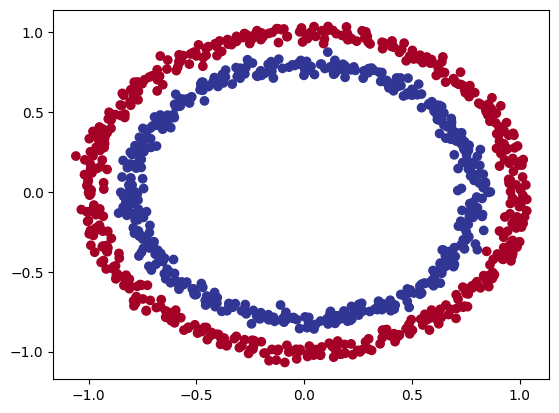

In [ ]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

## Input and output shapes

In [ ]:
# check he shapes of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

## steps in modeling


the steps in modeling in tensorflow are typically:


1. create the model
2. compile the model
3. fit the model
4. evaluate the model
5. tweak
6. evaluate

In [ ]:
import tensorflow as tf

In [ ]:
'''

#set the random seed
tf.random.set_seed(42)

#1 create the model using the sequential api
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2 compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3 fit the model
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=5)
'''

'\n\n#set the random seed\ntf.random.set_seed(42)\n\n#1 create the model using the sequential api\nmodel_1=tf.keras.Sequential([\n    tf.keras.layers.Dense(1)\n])\n\n#2 compile the model\nmodel_1.compile(loss=tf.keras.losses.BinaryCrossentropy,\n                optimizer=tf.keras.optimizers.SGD(),\n                metrics=["accuracy"])\n\n#3 fit the model\nmodel_1.fit(tf.expand_dims(X, axis=-1), y, epochs=5)\n'

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])


In [ ]:
# 3. Fit the model
model_1.fit(X, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 4.0303 - accuracy: 0.4730
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 2.0033 - accuracy: 0.4710
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7227 - accuracy: 0.4790
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.4950
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4920
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4900
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5080
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4840
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4940
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4580


In [ ]:
# 3. fit the model. lets try for longer
model_1.fit(X, y, epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and our model is getting around 50% accuracy... its performing as if its guessing

So lets step things up a notch by adding an extra layer

In [ ]:
#set the random seed
tf.random.set_seed(42)

#1 create a model, this time with 2 layers
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2 compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3 fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [ ]:
#4 evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

still only 50% accuracy for binary classification. so essentially guessing

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## improving our model

lets look at our bag of tricks to see how we can imrpove our model:
1. create a model: add more layers, add more neurons per hidden layer
2. compile a model: choose a different optimizer function (SGD or Adam)
3. fitting a model: do more epochs (leave it training for longe)

In [ ]:
#set random seed
tf.random.set_seed(42)

#1 build the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2 compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
#3 fit the model
model_3.fit(X,y,epochs=100,verbose=0)


In [ ]:
#4 evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5100


[0.695278525352478, 0.5099999904632568]

model is still performing around 50%

lets try to visualize the predictions

to visualize our models predictions lets create a function 'plot_decision_boundary()', this function will:

* take ina  trained model, features (X) and labels (y)
* create a meshgrid of the different X values
* make preductions across the meshgrid
* plot the preduction as well as a line between zones

In [ ]:
import numpy as np

In [ ]:
'''
def plot_decision_boundary(model,X,y):
  #define axis boundaries
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max+0.1
  xx,yy=np.meshgrid(np.linspace(X_min,x_max,100),
                    np.linspace(y_min,y_max,100))
  #create x values
  x_in=np.c_[xx.ravel(),yy.ravel()]

  #make predictions
  y_pred=model.predict(x_in)

  #check for multiclass
  if len(y_pred[0])>1:
    print("were doing multiclass classification")
    #we have to reshape our predictions to get them ready for plotting
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)

  #plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdylBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())
'''

'\ndef plot_decision_boundary(model,X,y):\n  #define axis boundaries\n  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1\n  y_min,y_max=X[:,1].min()-0.1,X[:,1].max+0.1\n  xx,yy=np.meshgrid(np.linspace(X_min,x_max,100),\n                    np.linspace(y_min,y_max,100))\n  #create x values\n  x_in=np.c_[xx.ravel(),yy.ravel()]\n\n  #make predictions\n  y_pred=model.predict(x_in)\n\n  #check for multiclass\n  if len(y_pred[0])>1:\n    print("were doing multiclass classification")\n    #we have to reshape our predictions to get them ready for plotting\n    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)\n  else:\n    print("doing binary classification")\n    y_pred=np.round(y_pred).reshape(xx.shape)\n\n  #plot the decision boundary\n  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdylBu,alpha=0.7)\n  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)\n  plt.xlim(xx.min(),xx.max())\n  plt.ylim(yy.min(),yy.max())\n'

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


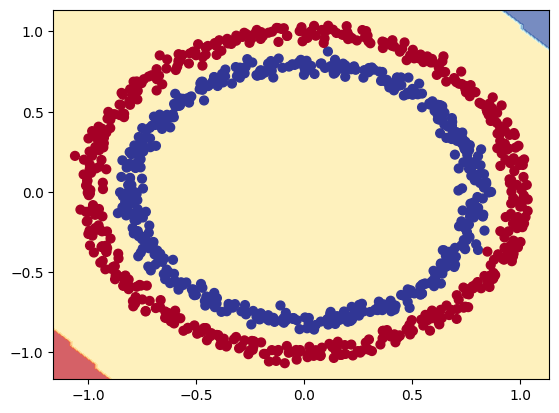

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)


the data is trying to be split from red dots and blue dots with a straight line. this is not good obviously for circular data

In [ ]:
#lets see if our model can be used for a regression problem...
tf.random.set_seed(42)

#create some regression data
X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5)

#split our regression data into training and test sets
X_reg_train=X_regression[:150]
X_reg_test=X_regression[150:]
y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]

#fit our model to the regression data
model_3.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100


ValueError: ignored

oh wait...  we compiled our model for a binary classification problem.

but... were now working on a regression problem, lets change the model to suit our data

In [ ]:

#set random seed
tf.random.set_seed(42)

#1 create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2 compile the model, this time with a regression specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])


In [ ]:
'''
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific
'''


"\n# Setup random seed\ntf.random.set_seed(42)\n\n# Recreate the model\nmodel_3 = tf.keras.Sequential([\n  tf.keras.layers.Dense(100),\n  tf.keras.layers.Dense(10),\n  tf.keras.layers.Dense(1)\n])\n\n# Change the loss and metrics of our compiled model\nmodel_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific\n                optimizer=tf.keras.optimizers.Adam(),\n                metrics=['mae']) # change the metric to be regression-specific\n"

In [ ]:
#3 fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 326.0497 - mae: 326.0497
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 219.8079 - mae: 219.8079
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 114.7012 - mae: 114.7012
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 48.2092 - mae: 48.2092
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 75.7349 - mae: 75.7349
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 64.8972 - mae: 64.8972
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 43.0295 - mae: 43.0295
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 50.4876 - mae: 50.4876
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 41.7230 - mae: 41.7230
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 44.8326 - mae: 44.8326
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 5ms/step


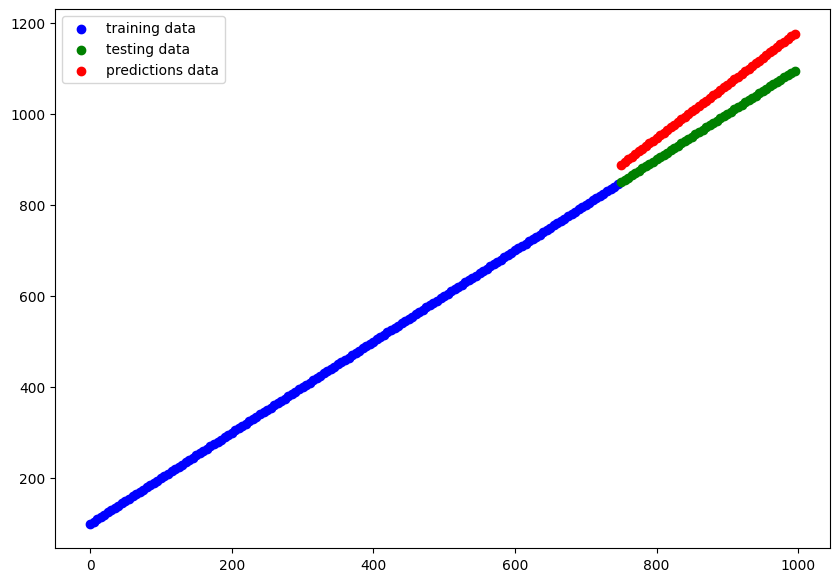

In [ ]:
#make predictions with our trained model
y_reg_preds=model_3.predict(X_reg_test)

#plot the models predictions against our own regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="testing data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="predictions data")
plt.legend();

## the missing piece: non-lineararity modeling

In [ ]:
#set the random seed
tf.random.set_seed(42)

#1 create the model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="linear")
])

#2 compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])



In [ ]:
#3 fit the model
history=model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.3235 - accuracy: 0.4160
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2187 - accuracy: 0.4370
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 4.1480 - accuracy: 0.4550
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0749 - accuracy: 0.4530
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 3.9409 - accuracy: 0.4550
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 3.8638 - accuracy: 0.4610
Epoch 7/100
32/32 [==============================] - 0s 12ms/step - loss: 3.8143 - accuracy: 0.4590
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 3.8027 - accuracy: 0.4590
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 3.7322 - accuracy: 0.4630
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 3.6689 - accuracy: 0.4670
Epoch 11

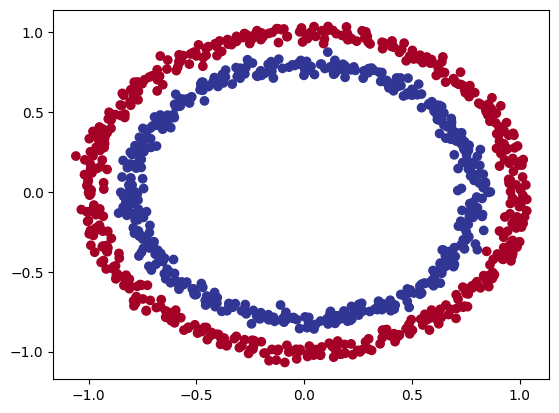

In [ ]:
#check out the data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


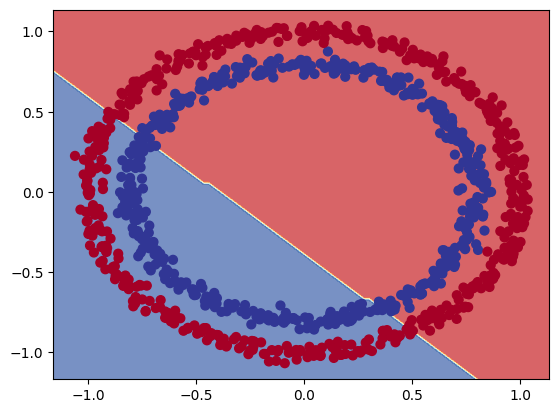

In [ ]:
#check decision boundary
plot_decision_boundary(model_4,X,y)

Lets try build our first model with a non liear activation function

In [ ]:
#set the random seed
tf.random.set_seed(42)

#1 create the model
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="relu")
])

#2 compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

In [ ]:
#3 fit the model
history=model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.4306 - accuracy: 0.4750
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4121 - accuracy: 0.4730
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3991 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3712 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3186 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2877 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2789 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2586 - accuracy: 0.4710
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2157 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2135 - accuracy: 0.4750
Epoch 11/

In [ ]:
#Time to replicate the multilayer neural network from tensorflow playground to distinguish the red from the blue circle. with 2 neurons input->4 neurons->4 neurons->output

#set the random seed
tf.random.set_seed(42)

#1 create the model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(1)
])

#2 compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

In [ ]:
#3 fit the model
history=model_6.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


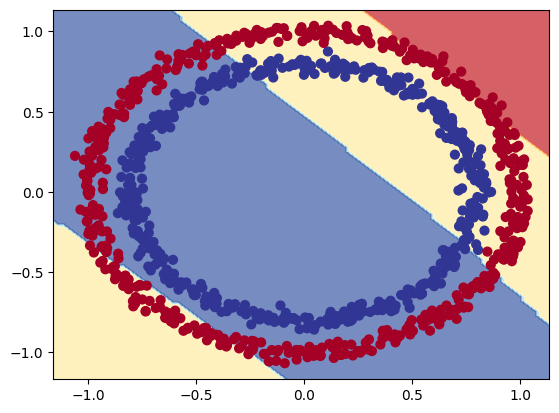

In [ ]:
plot_decision_boundary(model_6,X,y)

Lets try now with sigmoid activation at the end


In [ ]:
#set the random seed
tf.random.set_seed(42)

#1 create the model
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(1,activation="sigmoid")
])

#2 compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

In [ ]:
#3 fit the model
history=model_7.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.9910


[0.3105012774467468, 0.9909999966621399]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


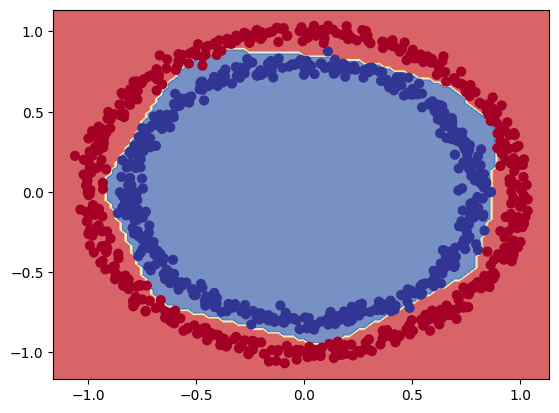

In [ ]:
plot_decision_boundary(model_7,X,y)

Now we've discussed the concept of linear and non linear functions (or lines), so lets see them in action.

In [ ]:
#create a toy tensor (similar to the data we paass into our models)
import tensorflow as tf
import matplotlib.pyplot as plt

A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

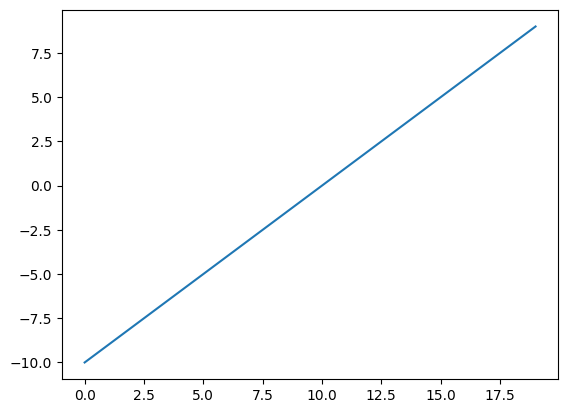

In [ ]:
#visualize our toy tensor
plt.plot(A)

In [ ]:
#lets start by replicating sigmoid function. sigmoid(x) = (1)/(1+exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

#use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

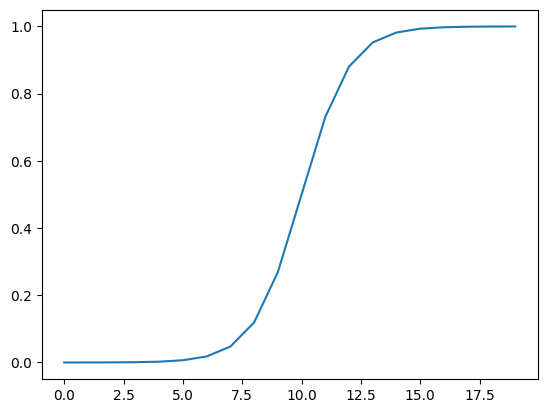

In [ ]:
#plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
#lets recreate a relu function
def relu(x):
  return tf.maximum(0,x)

#pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

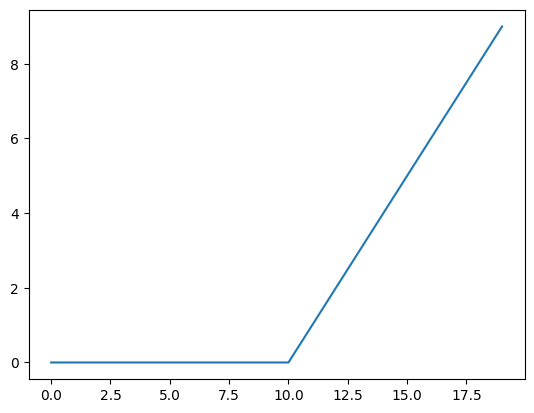

In [ ]:
plt.plot(relu(A))

Right now we have 3 different activation functions weve studied
1. linear.
2. sigmoid
3. relu

## Evaluating and improving our binary classification model

So far weve been training on testing on the same data set, however for machine learning this is no good.

so lets create a training and test set

In [ ]:
#split into train and test split
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
#lets recreate a model to fit on the training data and evaluate on the testing the data

#set random seed
tf.random.set_seed(42)

#1 create the model (same as the binary classification model)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#2 compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

#3 fit the model
history=model_8.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
#4 evaluate the model
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.4158 - accuracy: 0.8750


[0.41575103998184204, 0.875]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


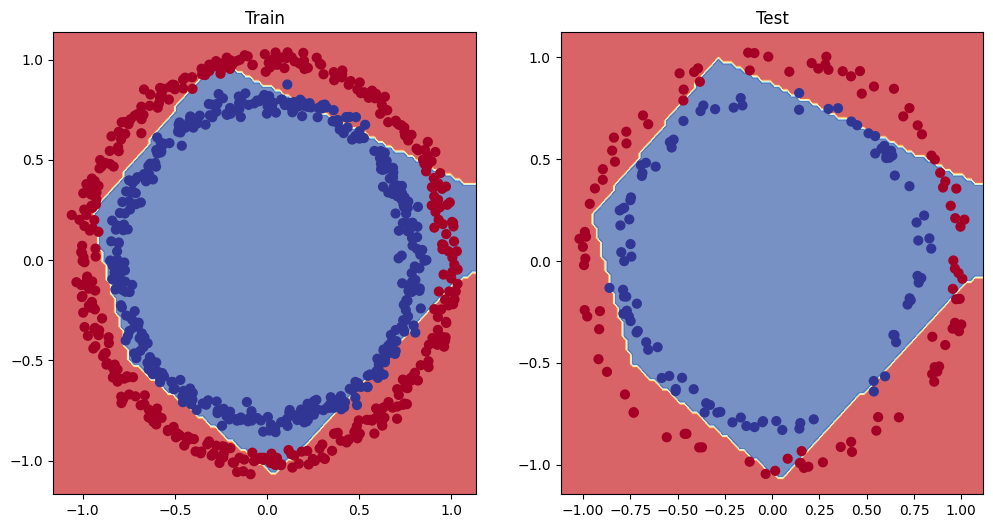

In [ ]:
#plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X_test,y_test)
plt.show();

## Plot the loss (or training) curves

In [ ]:
#convert the history object into data frame
pd.DataFrame(history.history)

,loss,accuracy
0,0.696759,0.48000
1,0.695457,0.47875
2,0.694425,0.47875
3,0.693529,0.50125
4,0.692755,0.50000
...,...,...
95,0.436079,0.87250
96,0.433134,0.87250
97,0.428691,0.87375
98,0.425078,0.88000


Text(0.5, 1.0, 'model_8 loss curves')

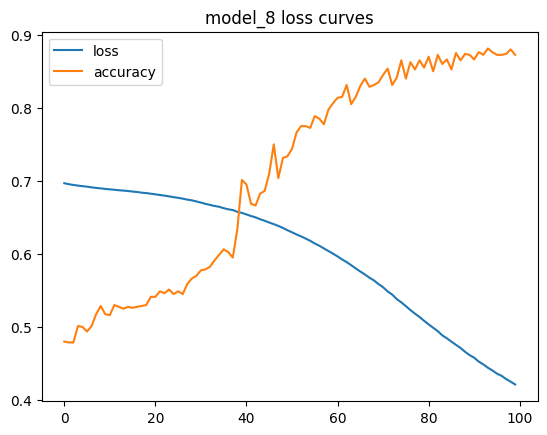

In [ ]:
#plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves")

Note: For many problems, the loss function going down means the model is improving (the preductions its making is getting closer to the ground truth value)

## finding the ideal learning rate

to find the ideal learning rate (the learning rate where the loss decreases the most during training) were going to use the following steps:
* a learning rate callback -  you think of a callback as an extra piece of functionality you can add to your model while its training
* another model (we could use the same one as above, but were practicing building models here)
* a modified loss curves plot

In [ ]:
#set random seed
tf.random.set_seed(42)

#1 create the model (same as the binary classification model)
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#2 compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

#2.5 create a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

#3 fit the model with lr schdeuler callback
history_9=model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])



Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6903 - accuracy: 0.4800 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.4900 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.4888 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.4875 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.4888 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.4913 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.4950 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

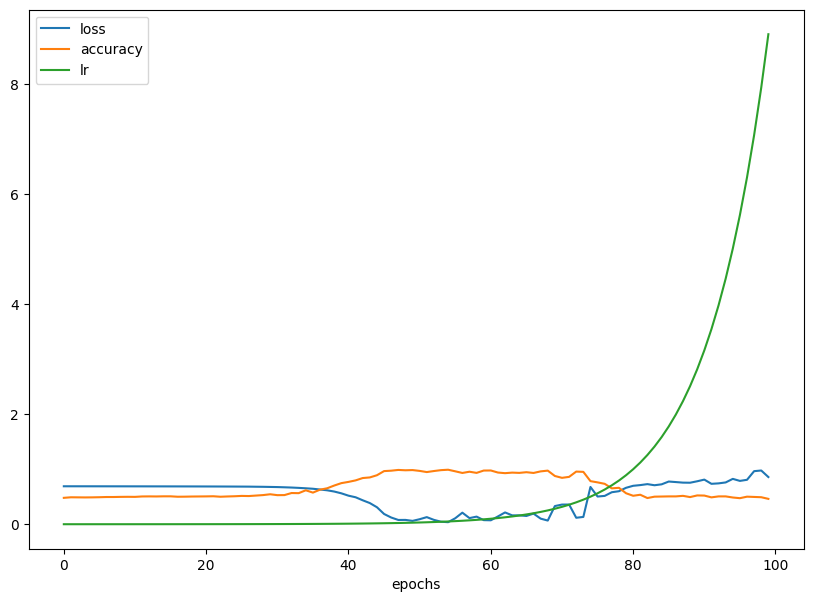

In [ ]:
#check out the history
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs");

In [ ]:
#plot the learning rate vs the loss
lrs=1e-4*(10**(tf.range(100)/20))
len(lrs)

100

Text(0.5, 1.0, 'learning rate vs loss')

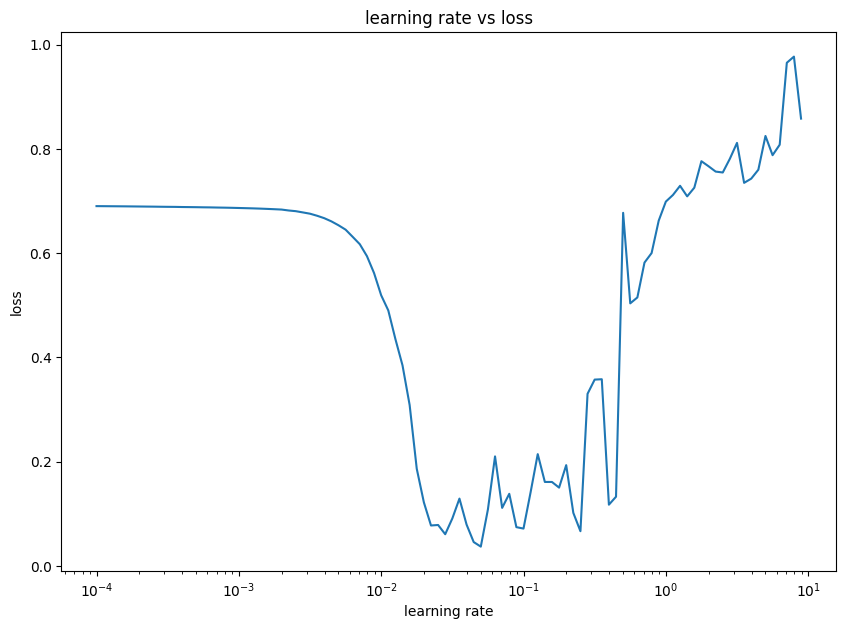

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")

From above:
* we need the learning rate such that the loss decreases the most. will be about 10 times larger than the learning rate where the loss is the lowest

It looks like the ideal learning rate is 0.02

In [ ]:
#lets try using a higher potentially ideal learning rate with the same model

#set random seed
tf.random.set_seed(42)

#1 create the model (same as the binary classification model)
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#2 compile the model
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

#3 fit the model with lr schdeuler callback
history_10=model_10.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6941 - accuracy: 0.5063
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5200
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.5300
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5263
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.5337
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5400
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6787 - accuracy: 0.5462
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.5575
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5650
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6752 - accuracy: 0.5663
Epoch 11/

In [ ]:
#evaluate model_10 on the test dataset
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2237 - accuracy: 0.9900


[0.22370260953903198, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


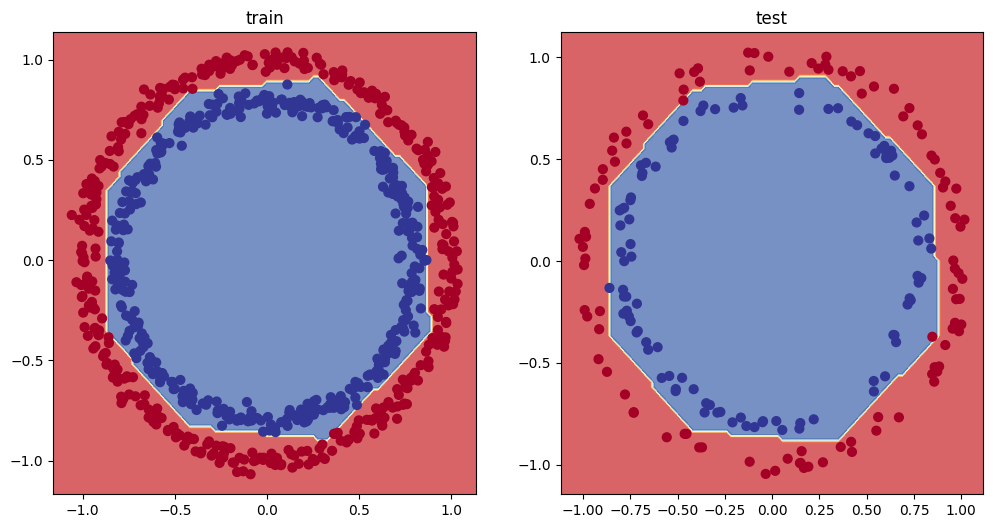

In [ ]:
#plot the decision boundary of the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_10,X_test,y_test)
plt.show()

##More classification evaluation methods

metric name:
* accuracy = default metric for classification problems. not the best for imbalanced classes.

* precision = higher preciion leads to less false positives

* recall = higher recall leads to less false negatives

* f1 score = combination of precision and recall, usually a good overall metric for a classification method

* confusion matrix = when comparing predictions to truth labels to see where the model gets confused. can be hard to use with large numbers of classes

In [ ]:
loss,accuracy=model_10.evaluate(X_test,y_test)
print(f"model loss on the test set: {loss}")
print(f"model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.9900
model loss on the test set: 0.22370260953903198
model accuracy on the test set: 99.00%


How about a confusion matrix?

In [ ]:
#create a confusion matrix
from sklearn.metrics import confusion_matrix

#make predictions
y_preds=model_10.predict(X_test)

#create a confusion matrix
confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[0.7124912 ],
       [0.8596744 ],
       [0.7295877 ],
       [0.7852198 ],
       [0.29389355],
       [0.0672732 ],
       [0.7141509 ],
       [0.15543595],
       [0.8558384 ],
       [0.30235678]], dtype=float32)

Error above says: Classification metrics can't handle a mix of binary and continuous targets

We can see the test values are binary 0 or 1 and the predictions are continous values between 0 and 1. this is prediction probability form ie the standard output from the sigmoid (or softmax) activation functions.

The closer the value is to 0 the more it thinks it is a 0 and the closer the value is to 1 the more it thinks its 1

In [ ]:
#convert our prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

#create a confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

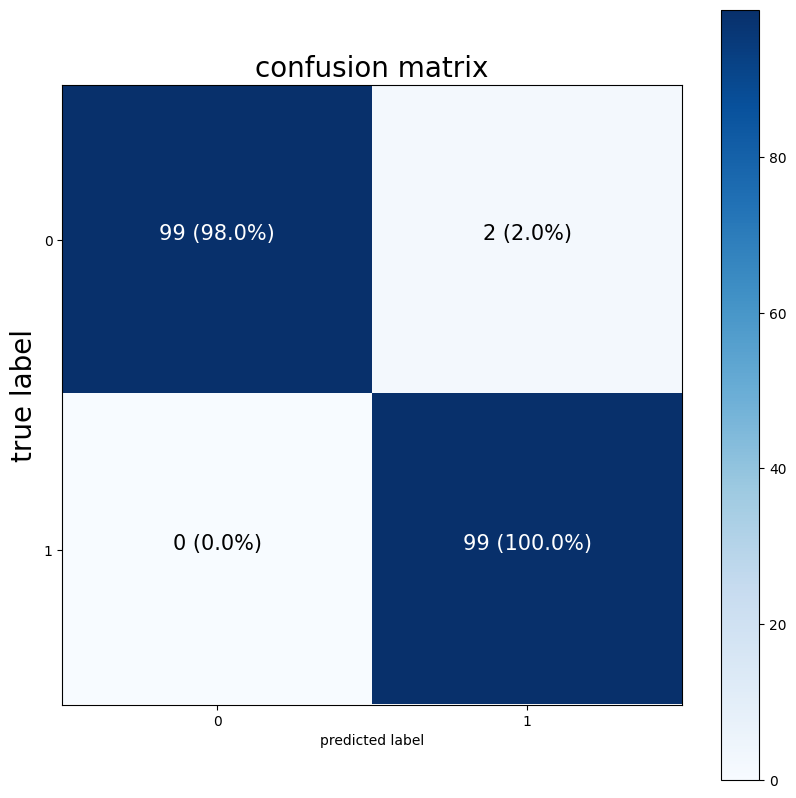

In [ ]:
#note: the confusion matrix were about to write is a remix of scikit learns plot_confusion_matrix
import itertools

#create a confusion matrix
cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norm=cm.astype("float")/cm.sum(axis=1)[:np.newaxis] #normalize our confusion matrix
n_classes=cm.shape[0]

#lets pretty it
fig,ax=plt.subplots(figsize=(10,10))

#create a matrix plot
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

#create classes
classes=False

if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

#label the axes
ax.set(title="confusion matrix",
       xlabel="predicted label",
       ylabel="true label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

#set the x axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom

#adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.tick_bottom()
ax.title.set_size(20)

#set threshold for different colors
threshold=(cm.max()+cm.min())/2.

#plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j]>threshold else "black",
           size=15)

In [ ]:
cm_norm

array([[0.98019802, 0.02020202],
       [0.        , 1.        ]])

In [ ]:
n_classes

2

# working with a larger example (multiclass classification)

When u have more than two classes as an option, its known as multi class classification
* this means if u have 3 different classes, its multi class classification
* it also means if you have 100 different classes, its multi class classification

To practice multi-class classificationm were going to build a neural network to classify images of clothing. tensorflow fashion mnist

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#the data has already been sorted into training and test sets for us
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

In [ ]:
#show the first training example
print(f"training sample:\n{train_data[0]}\n")
print(f"training label:\n{train_labels[0]}\n")

training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
#check the shape of a single example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

label has no shape bc just scalar and scalar tensor has no shape

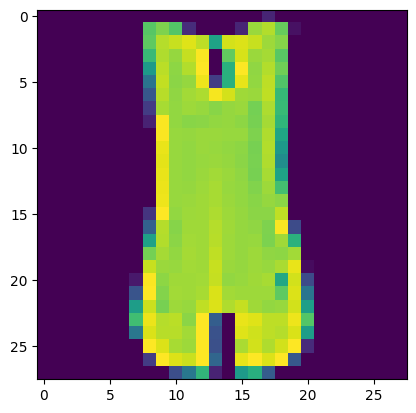

In [ ]:
#plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[4])

In [ ]:
#check out training label
train_labels[4]

0

NOTE - Label	Description

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [ ]:
#create a small list so we can index onto our training labels so theyre human readable
class_names=["tshirt/top","trouser","pullover","dress","coat","sandal","shirt","sneaker","bag","ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'bag')

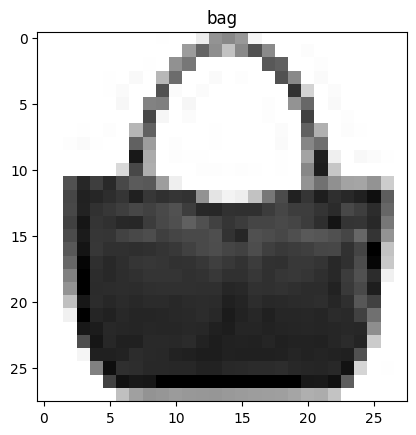

In [ ]:
#plot another image and its label
index_of_chocie=100
plt.imshow(train_data[index_of_chocie],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_chocie]])

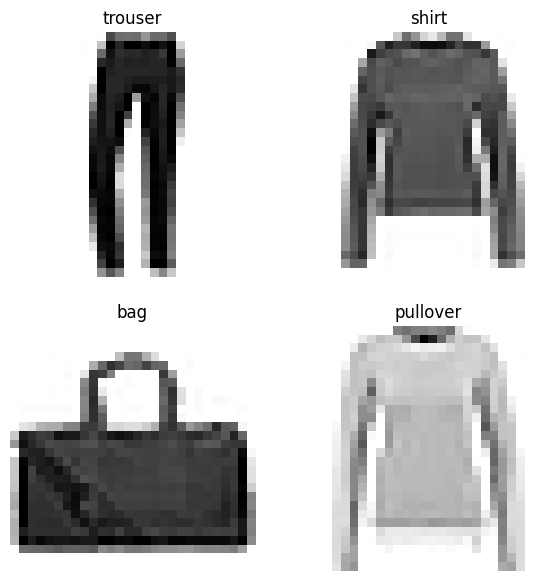

In [ ]:
#plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## building a multi class classification model

for our multiclass classification model, we can use a similar architecture to our binary classifiers, however, were going to have to tweak a few things:

* input shape = 28x28 pixels for each image
* output shape = 10, 10 different types of clothing labels
* loss function = tf.keras.losses.SparseCategoricalCrossentropy() if labels are in integer form.
* loss function = tf.keras.losses.CategoricalCrossentropy() if labels are one hot encoded
* output layer activation = softmax



In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
flatten_model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
28*28

784

In [ ]:
#set random seed
tf.random.set_seed(42)

#create the model
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#fit the model
non_norm_history=model_11.fit(train_data,
                              train_labels,
                              epochs=10,
                              validation_data=(test_data,test_labels))



Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 2.3954 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3030 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accura

In [ ]:
#check the model summary
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#check the min and max of the training data
train_data.min(),train_data.max()

(0, 255)

Neural networks like to have data normalized. -> have tensors in the form of numbers from the numbers 0 and 1

In [ ]:
#we can get our training and testing data from 0 and 1 by dividing by the maximum number. -> scaling normalization
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

#now check the min and max
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [ ]:
#now our data is normalized. lets try and try the same exact model just normalized data


#set random seed
tf.random.set_seed(42)

#create the model
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#fit the model
norm_history=model_12.fit(train_data_norm,
                          train_labels,
                          epochs=10,
                          validation_data=(test_data_norm,test_labels))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2804 - accuracy: 0.5189 - val_loss: 1.0004 - val_accuracy: 0.6003
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9263 - accuracy: 0.6193 - val_loss: 0.9081 - val_accuracy: 0.6462
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8402 - accuracy: 0.6671 - val_loss: 0.8325 - val_accuracy: 0.6557
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7842 - accuracy: 0.6910 - val_loss: 0.7896 - val_accuracy: 0.6944
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7524 - accuracy: 0.7038 - val_loss: 0.7948 - val_accuracy: 0.6904
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7272 - accuracy: 0.7285 - val_loss: 0.7639 - val_accuracy: 0.7221
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6973 - accuracy: 0.7526 - val_loss: 0.7449 - val_accuracy:

Val accuracy in this model with normalized data has gone from 30% accuracy to 76% accuracy

neural networks prefer data in neumerical form as well as scaled/normalized ie data between 0 and 1

<Axes: title={'center': 'normalized data'}>

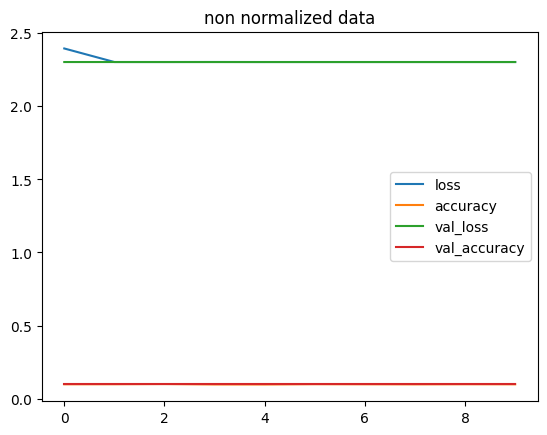

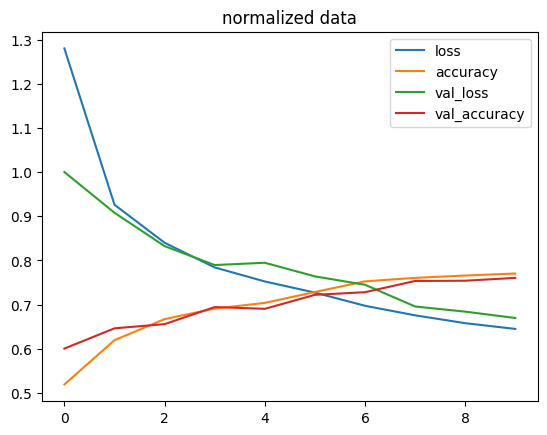

In [ ]:
import pandas as pd

#plot non normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="non normalized data")
#plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="normalized data")

The same model with slightly different data can produce dramatically different results. So when youre comparing models, its important to make sure youre comparing them on the same criteria. e.g. same architecture but different data or different architecture same data

## find the ideal learning rate

In [ ]:
# set random seed
tf.random.set_seed(42)

#create the model
model_13=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#create the learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))

#fit the model
find_lr_history=model_13.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_norm,test_labels),
                             callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.7464 - accuracy: 0.3330 - val_loss: 1.2974 - val_accuracy: 0.5172 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1716 - accuracy: 0.5534 - val_loss: 1.1023 - val_accuracy: 0.5532 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8787 - accuracy: 0.6632 - val_loss: 0.8409 - val_accuracy: 0.7023 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7723 - accuracy: 0.7230 - val_loss: 0.7841 - val_accuracy: 0.7243 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7455 - accuracy: 0.7336 - val_loss: 0.7516 - val_accuracy: 0.7376 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7245 - accuracy: 0.7408 - val_loss: 0.7624 - val_accuracy: 0.7382 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'finding the ideal learning rate')

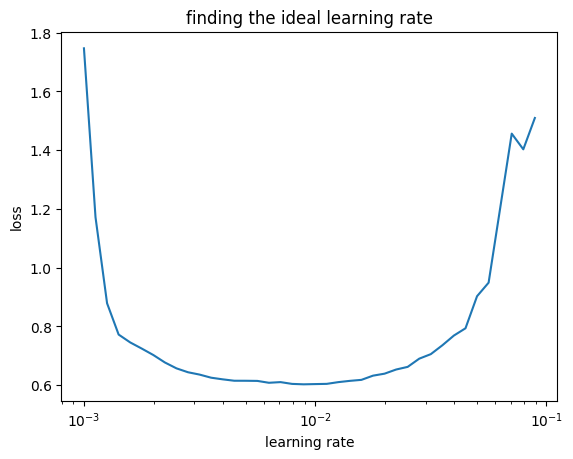

In [ ]:
#plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs=1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("finding the ideal learning rate")

the ideal learning rate is where the loss is decreasing the most sharply. go around to the lowest point and the part where its still going down

In [ ]:
10**-3

0.001

it appears that 10^-3 aka 0.001 is what the ideal learning rate is. that is also the default Adam optimizer learning rate.

In [ ]:
#Lets refit the model with the ideal learning rate

#set random seed
tf.random.set_seed(42)

#create a model
model_14=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

#fit the model
history_14=model_14.fit(train_data_norm,
                        train_labels,
                        epochs=20,
                        validation_data=(test_data_norm,test_labels))


Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0145 - accuracy: 0.6196 - val_loss: 0.7061 - val_accuracy: 0.7592
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6565 - accuracy: 0.7762 - val_loss: 0.6616 - val_accuracy: 0.7827
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5993 - accuracy: 0.7965 - val_loss: 0.6183 - val_accuracy: 0.7861
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5637 - accuracy: 0.8075 - val_loss: 0.5877 - val_accuracy: 0.7954
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5438 - accuracy: 0.8137 - val_loss: 0.5997 - val_accuracy: 0.7932
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5277 - accuracy: 0.8191 - val_loss: 0.5667 - val_accuracy: 0.8037
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5186 - accuracy: 0.8215 - val_loss: 0.5582 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results by training it for longer or changing the architecture
* Save and export it for use later

In [ ]:
#Create a random confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

'''
def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):
  #create a confusion matrix
  cm=confusion_matrix(y_true,tf.round(y_pred))
  cm_norm=cm.astype("float")/cm.sum(axis=1)[:np.newaxis] #normalize our confusion matrix
  n_classes=cm.shape[0]

  #lets pretty it
  fig,ax=plt.subplots(figsize=figsize)

  #create a matrix plot
  cax=ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #create classes
  #classes=False

  #set labels to be classes
  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  #label the axes
  ax.set(title="confusion matrix",
        xlabel="predicted label",
        ylabel="true label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #set the x axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.tick_bottom(text_size)
  ax.title.set_size(text_size)

  #set threshold for different colors
  threshold=(cm.max()+cm.min())/2.

  #plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]>threshold else "black",
            text_size=15)




In [ ]:
def make_confusion_matrix(y_true=test_labels, # ground truth test labels
                      y_pred=y_preds, # predicted labels
                      classes=class_names, # array of class label names
                      figsize=(15, 15),
                      text_size=10):
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
class_names

['tshirt/top',
 'trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

In [ ]:
#make some predictions with our model
y_probs=model_14.predict(test_data_norm) #probs is short for prediction probabilities
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.1406681e-05, 5.5344694e-13, 9.7674302e-10, 6.0871494e-06,
        1.1543010e-07, 3.6640975e-01, 2.6813028e-05, 7.0827357e-02,
        1.8869188e-02, 5.4384929e-01],
       [2.8125706e-04, 1.2068482e-08, 8.6920404e-01, 5.2018768e-06,
        4.6839066e-02, 2.9957863e-24, 8.3670177e-02, 0.0000000e+00,
        1.9566853e-07, 1.1669652e-27],
       [1.8743563e-08, 9.9974847e-01, 7.3231445e-07, 2.1016356e-04,
        4.0743853e-05, 4.1365371e-19, 9.9070512e-09, 3.8704940e-23,
        1.2832345e-08, 5.9424001e-21],
       [1.3167699e-08, 9.9978185e-01, 3.4910738e-07, 1.9343752e-04,
        2.4308092e-05, 1.1162975e-18, 5.6284661e-09, 6.8038170e-22,
        1.2540022e-08, 2.0465678e-20],
       [1.6279477e-01, 4.0794494e-06, 1.7862430e-01, 8.2971817e-03,
        2.2243300e-02, 3.6622346e-12, 6.2736702e-01, 2.8108897e-24,
        6.6929928e-04, 2.9759851e-12]], dtype=float32)

Note: remember to make predictions on the same kind of data your model was trained on. if data is trained on normalized data, predict on normalized data

In [ ]:
y_probs[0],tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]

(array([1.1406681e-05, 5.5344694e-13, 9.7674302e-10, 6.0871494e-06,
        1.1543010e-07, 3.6640975e-01, 2.6813028e-05, 7.0827357e-02,
        1.8869188e-02, 5.4384929e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'ankle boot')

In [ ]:
#convert all of the prediction probabilities into integers
y_preds=y_probs.argmax(axis=1)

#view the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

We now have the predictions in the same form as our test label

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[735,   2,  31,  92,   8,   5, 120,   0,   7,   0],
       [  1, 954,  10,  31,   3,   0,   1,   0,   0,   0],
       [ 18,   3, 724,  12, 150,   0,  90,   0,   3,   0],
       [ 44,  22,  13, 826,  53,   0,  35,   0,   7,   0],
       [  0,   4, 105,  24, 794,   0,  68,   0,   5,   0],
       [  0,   0,   0,   1,   0, 933,   0,  38,   5,  23],
       [135,   5, 122,  56, 160,   0, 506,   0,  14,   2],
       [  0,   0,   0,   0,   0,  55,   0, 914,   1,  30],
       [  1,   1,   2,  13,  15,   6,  51,   4, 907,   0],
       [  2,   0,   0,   0,   0,  36,   1,  43,   6, 912]])

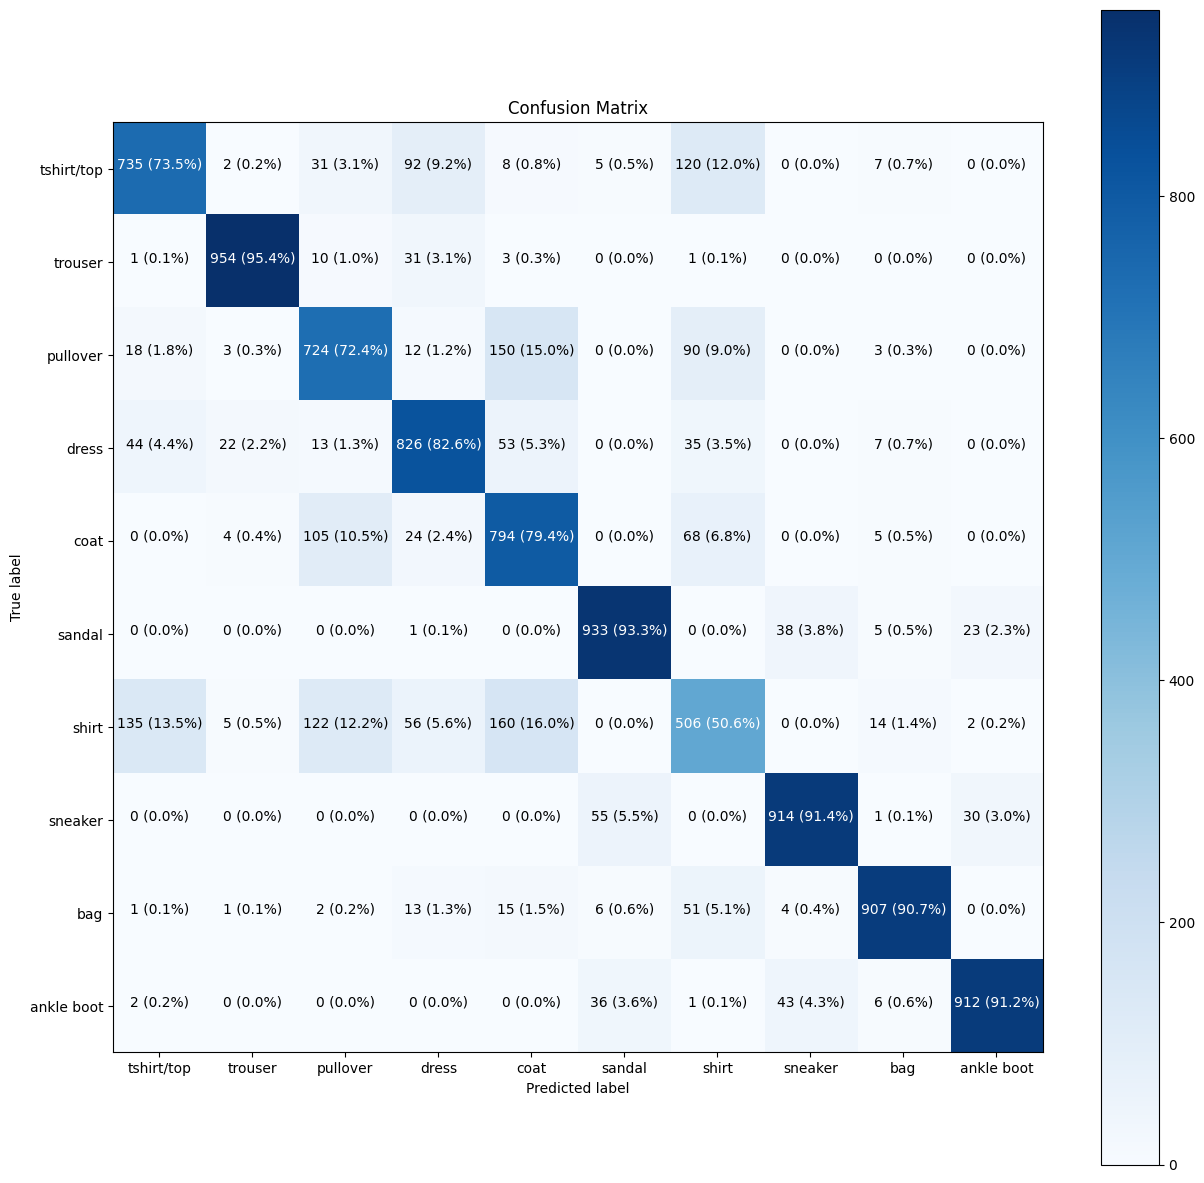

In [ ]:

#make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)




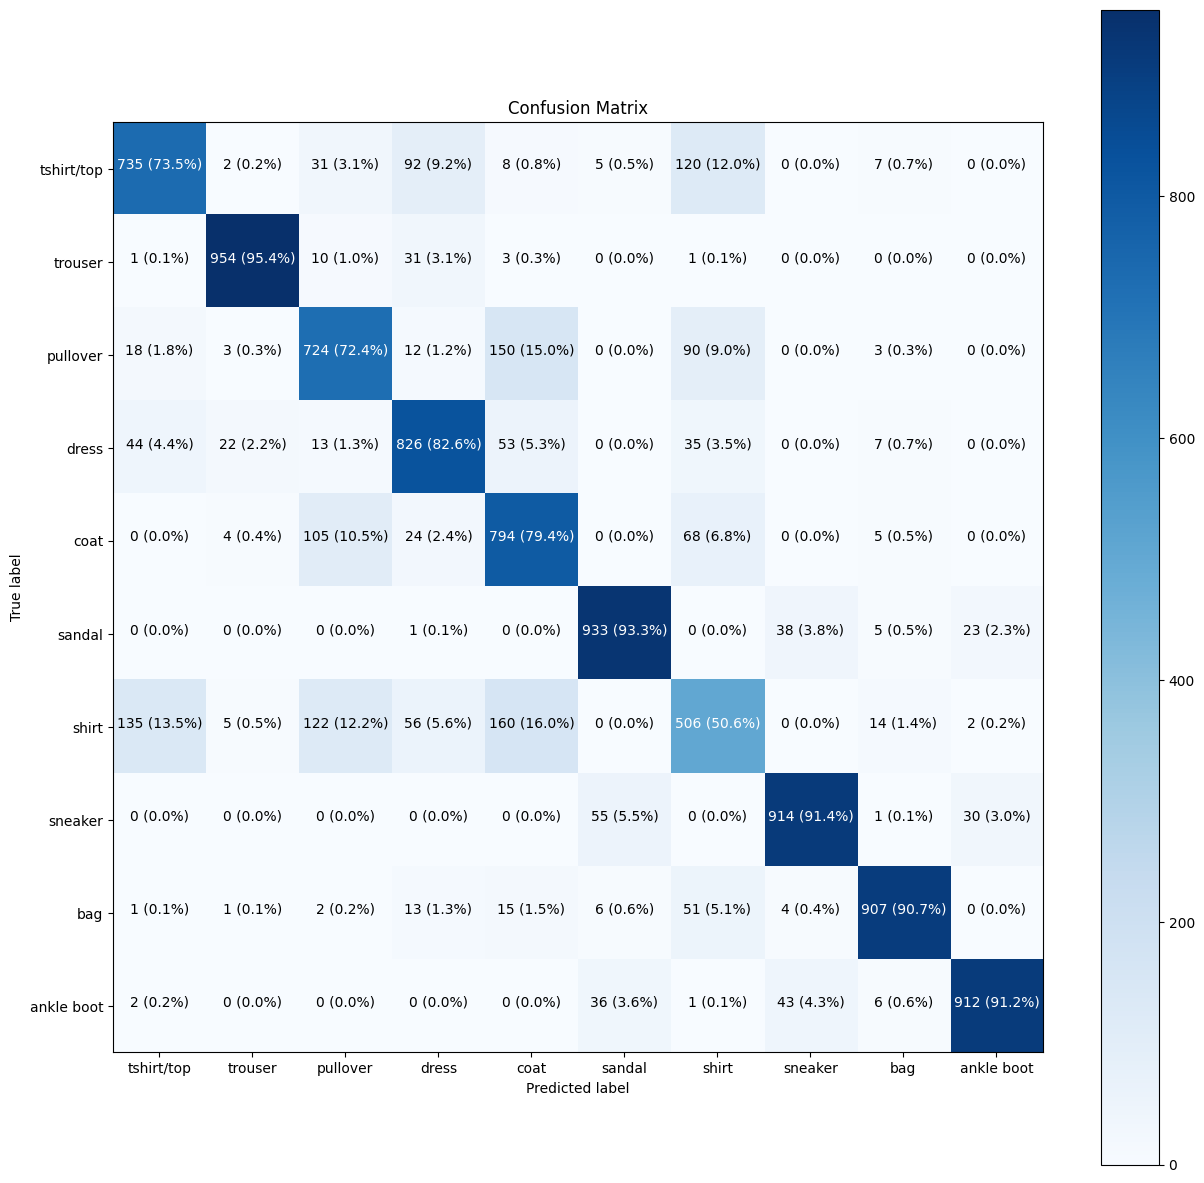

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Note: often when working with images and other forms of visual data, its a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of our models

how about we create a fun little function for:
* plot a random image
* make a prediction on said image
* label the plot with the truth label and predicted label

In [ ]:
import random
'''
def plot_random_image(model,images,true_labels,classes):
  #picks a random image and plots it and labels it with a prediction and truth label

  #setup a random integer
  i=random.randint(0,len(images))

  #create prediction and targets
  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]
  plt.imshow(target_image,cmap=plt.cm.binary)

  #change the color of the titles depending on if the prediction is right or wrong
  if pred_label==true_label:
    color="green"
  else:
    color="red"

  #add x label information (prediction/true label)
  plt.xlabel("pred: {} {:2.0f}% (true: {})".format(pred_label,100*tf.reduce_max(pred_probs)),true_label,color=color)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)


  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red
  plt.show()


In [ ]:
# check out a random image as well as its prediction
for k in range(4):
  plot_random_image(model_14,test_data_norm,test_labels,class_names)

NameError: ignored

## What patterns is our model learning

In [ ]:
#find the layers of our most recent model
model_14.layers

In [ ]:
#extract a particular layer
model_14.layers[1]

In [ ]:
#get the patterns of a layer in our network
weights,biases=model_14.layers[1].get_weights()

#shapes
weights,weights.shape

(array([[-0.38707036, -0.6080815 ,  0.6286458 , -0.0022203 ],
        [-0.32863852,  0.29086176,  0.13266097,  0.35973376],
        [-0.6435244 ,  0.49685964,  0.9023133 , -0.21857692],
        ...,
        [-0.47169483,  0.26148814,  0.13675939, -0.5158581 ],
        [ 0.02639118, -0.04544548, -0.39028692, -0.07551926],
        [-0.45196086,  0.04073421,  0.18132192, -0.08742138]],
       dtype=float32),
 (784, 4))

In [ ]:
model_14.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now lets check out the bias vector

In [ ]:
#biases and biases shape
biases,biases.shape

(array([0.6108425 , 0.2655153 , 0.46391758, 0.55744535], dtype=float32), (4,))

every neuron has a bias vector. each of these is paired with a weights matrix.

the bias vector also gets initialized as zeros at least in the case of tensorflow dense layer

the bias vector dictates how much the patterns within the corresponding weights matrix should influence the next hidden layer

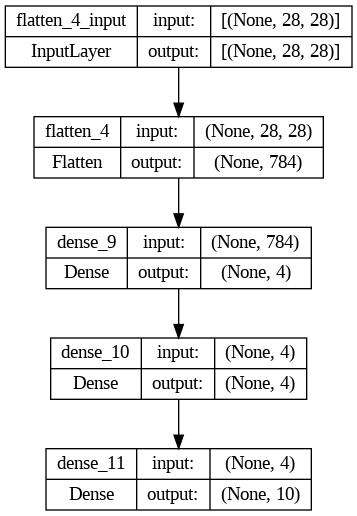

In [ ]:
#lets check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

#see the inputs and outputs of each layer
plot_model(model_14,show_shapes=True)